# Large Scale Data Processing on Movielens dataset

##Team Lucity: Members

      Nathamayil N 19BCE1468
      Sayan Roy    19BCE1529
      Debarshi Das 19BCE1608
      Amrit Sen    19BPS1036

##About the Project
In our project we are going to adopt to the steps of Data Processing in order to demostrate Large Scale data Processing.
### The Various Stages of data Processing are:
  - Data Collection
  - Data Preparation
  - Data Input
  - Data Processing
  - Data Output


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Data Collection**: Using a Data Scraper

Here we have scraped the movies data from IMDb website. The details stored in our dataset has the fieldnames: Name, Year, Runtime, Rating, Genre

In [ ]:
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup
from bs4 import SoupStrainer
import requests
import csv

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from math import sqrt

from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [ ]:

surl ="https://www.imdb.com/search/title/?title_type=feature&year=1950-01-01,2021-12-31&sort=num_votes,desc&start="
eurl = "&ref_=adv_nxt"

rows = []

filename = "imdb.csv"
with open(filename, "w", newline='') as f:
  w = csv.DictWriter(f,['Name','Year','Runtime','Rating','Genre'])
  w.writeheader()

  for i in range (1, 3000, 52):
    r = requests.get(surl + str(i) + eurl)
    soup = BeautifulSoup(r.content, 'html5lib')
    table = soup.find_all('div', attrs = {'class':'lister-item mode-advanced'})
 
# print((table))
    for container in table:
        name = container.img["alt"]
        year_mov = container.findAll("span", {"class": "lister-item-year"})
        year = year_mov[0].text.lstrip('(').rstrip(')')
        runtime_mov = container.findAll("span", {"class": "runtime"})
        runtime = runtime_mov[0].text
        score_mov = container.findAll("strong", {})
        score = score_mov[0].text
        gen_mov = container.findAll("span", {'class': 'genre'})
        gen = gen_mov[0].text.lstrip('\n')
        
        row = {}
        row['Name'] = name
        row['Year'] = year
        row['Runtime'] = runtime
        row['Rating'] = score
        row['Genre'] = gen

        rows.append(row)
        # print(name + ", " + year + ", " + runtime +  ", " + score + ", " + gen + "\n")
        # f.write(name + "," + year + "," + runtime +  "," + score + "," + gen + "\n")
        for row in rows:
          w.writerow(row)

## **Data Cleaning**: Preparing Data

In [ ]:
data = pd.read_csv('imdb.csv')

In [ ]:
data.drop_duplicates(subset = "Name", keep = 'first' , inplace = True )

In [ ]:
data.sort_values("Rating",axis = 0, ascending = False, inplace = True)

In [ ]:
data.reset_index(drop=True, inplace=True)
data

Name  ...                                   Genre
0     The Shawshank Redemption  ...                       Drama            
1                The Godfather  ...                Crime, Drama            
2              Soorarai Pottru  ...                       Drama            
3              The Dark Knight  ...        Action, Crime, Drama            
4       The Godfather: Part II  ...                Crime, Drama            
...                        ...  ...                                     ...
2848                Epic Movie  ...  Adventure, Comedy, Fantasy            
2849            Disaster Movie  ...              Comedy, Sci-Fi            
2850                     Radhe  ...     Action, Crime, Thriller            
2851                      Reis  ...            Biography, Drama            
2852                   Sadak 2  ...               Action, Drama            

[2853 rows x 5 columns]

In [ ]:
pattern = "^[0-9]{4}$"
filter = data['Year'].str.contains(pattern)
data = data[filter]

In [ ]:
# pd.to_numeric(data.Year)
data.Year = data.Year.astype(int)

In [ ]:
print("\ndata Info:\n")
print(data.info())

print("\ndata Shape:\n")
print (data.shape)


data Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2657 entries, 0 to 2852
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Name     2657 non-null   object 
 1   Year     2657 non-null   int64  
 2   Runtime  2657 non-null   object 
 3   Rating   2657 non-null   float64
 4   Genre    2657 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 124.5+ KB
None

data Shape:

(2657, 5)


In [ ]:
data.head(60)

Name  ...                                     Genre
0                            The Shawshank Redemption  ...                         Drama            
1                                       The Godfather  ...                  Crime, Drama            
2                                     Soorarai Pottru  ...                         Drama            
3                                     The Dark Knight  ...          Action, Crime, Drama            
4                              The Godfather: Part II  ...                  Crime, Drama            
5                                        12 Angry Men  ...                  Crime, Drama            
6                                        Pulp Fiction  ...                  Crime, Drama            
7                                    Schindler's List  ...     Biography, Drama, History            
8       The Lord of the Rings: The Return of the King  ...      Action, Adventure, Drama            
9                                        Forrest Gump  ...                Drama, Romance            
10  The Lord of the Rings: The Fellowship of the Ring  ...      Action, Adventure, Drama            
11                     The Good, the Bad and the Ugly  ...                       Western            
12                                         Fight Club  ...                         Drama            
13                                          Inception  ...     Action, Adventure, Sci-Fi            
14                                    The Mountain II  ...            Action, Drama, War            
15                    One Flew Over the Cuckoo's Nest  ...                         Drama            
16     Star Wars: Episode V - The Empire Strikes Back  ...    Action, Adventure, Fantasy            
17                                         Goodfellas  ...       Biography, Crime, Drama            
18                                         The Matrix  ...                Action, Sci-Fi            
19              The Lord of the Rings: The Two Towers  ...      Action, Adventure, Drama            
20                           The Silence of the Lambs  ...        Crime, Drama, Thriller            
21                                              Se7en  ...         Crime, Drama, Mystery            
22                                      Seven Samurai  ...      Action, Adventure, Drama            
23                                       Interstellar  ...      Adventure, Drama, Sci-Fi            
24                                      Spirited Away  ...  Animation, Adventure, Family            
25                                     The Green Mile  ...         Crime, Drama, Fantasy            
26                                Saving Private Ryan  ...                    Drama, War            
27                                  Life Is Beautiful  ...        Comedy, Drama, Romance            
28                                        City of God  ...                  Crime, Drama            
29                 Star Wars: Episode IV - A New Hope  ...    Action, Adventure, Fantasy            
30                                           Hamilton  ...     Biography, Drama, History            
31                                           Whiplash  ...                  Drama, Music            
32                                             Psycho  ...     Horror, Mystery, Thriller            
33                             Grave of the Fireflies  ...         Animation, Drama, War            
34                                    Cinema Paradiso  ...                Drama, Romance            
35                       Once Upon a Time in the West  ...                       Western            
36                                        Rear Window  ...             Mystery, Thriller            
37                                 The Usual Suspects  ...      Crime, Mystery, Thriller            
38                         Terminator 2: Judgment Day  ...                Action, Sci-Fi            
39       

In [ ]:
data.tail(10)

Name  ...                                   Genre
2842              Catwoman  ...      Action, Crime, Fantasy            
2843              365 Days  ...              Drama, Romance            
2845     Meet the Spartans  ...  Animation, Comedy, Fantasy            
2846  Dragonball Evolution  ...  Action, Adventure, Fantasy            
2847     Battlefield Earth  ...   Action, Adventure, Sci-Fi            
2848            Epic Movie  ...  Adventure, Comedy, Fantasy            
2849        Disaster Movie  ...              Comedy, Sci-Fi            
2850                 Radhe  ...     Action, Crime, Thriller            
2851                  Reis  ...            Biography, Drama            
2852               Sadak 2  ...               Action, Drama            

[10 rows x 5 columns]

In [ ]:
# data.drop([193], inplace = True

In [ ]:
print("\ndata Descroption:\n")
data.describe()


data Descroption:



Year       Rating
count  2657.000000  2657.000000
mean   2003.127964     6.922770
std      13.019021     0.883153
min    1950.000000     1.100000
25%    1998.000000     6.400000
50%    2006.000000     7.000000
75%    2012.000000     7.600000
max    2021.000000     9.300000

## **Data Visualization**

Data visualization gives us a clear idea of what the information means by giving it visual context through maps or graphs. This makes the data more natural for the human mind to comprehend and therefore makes it easier to identify trends, patterns, and outliers within large data sets.

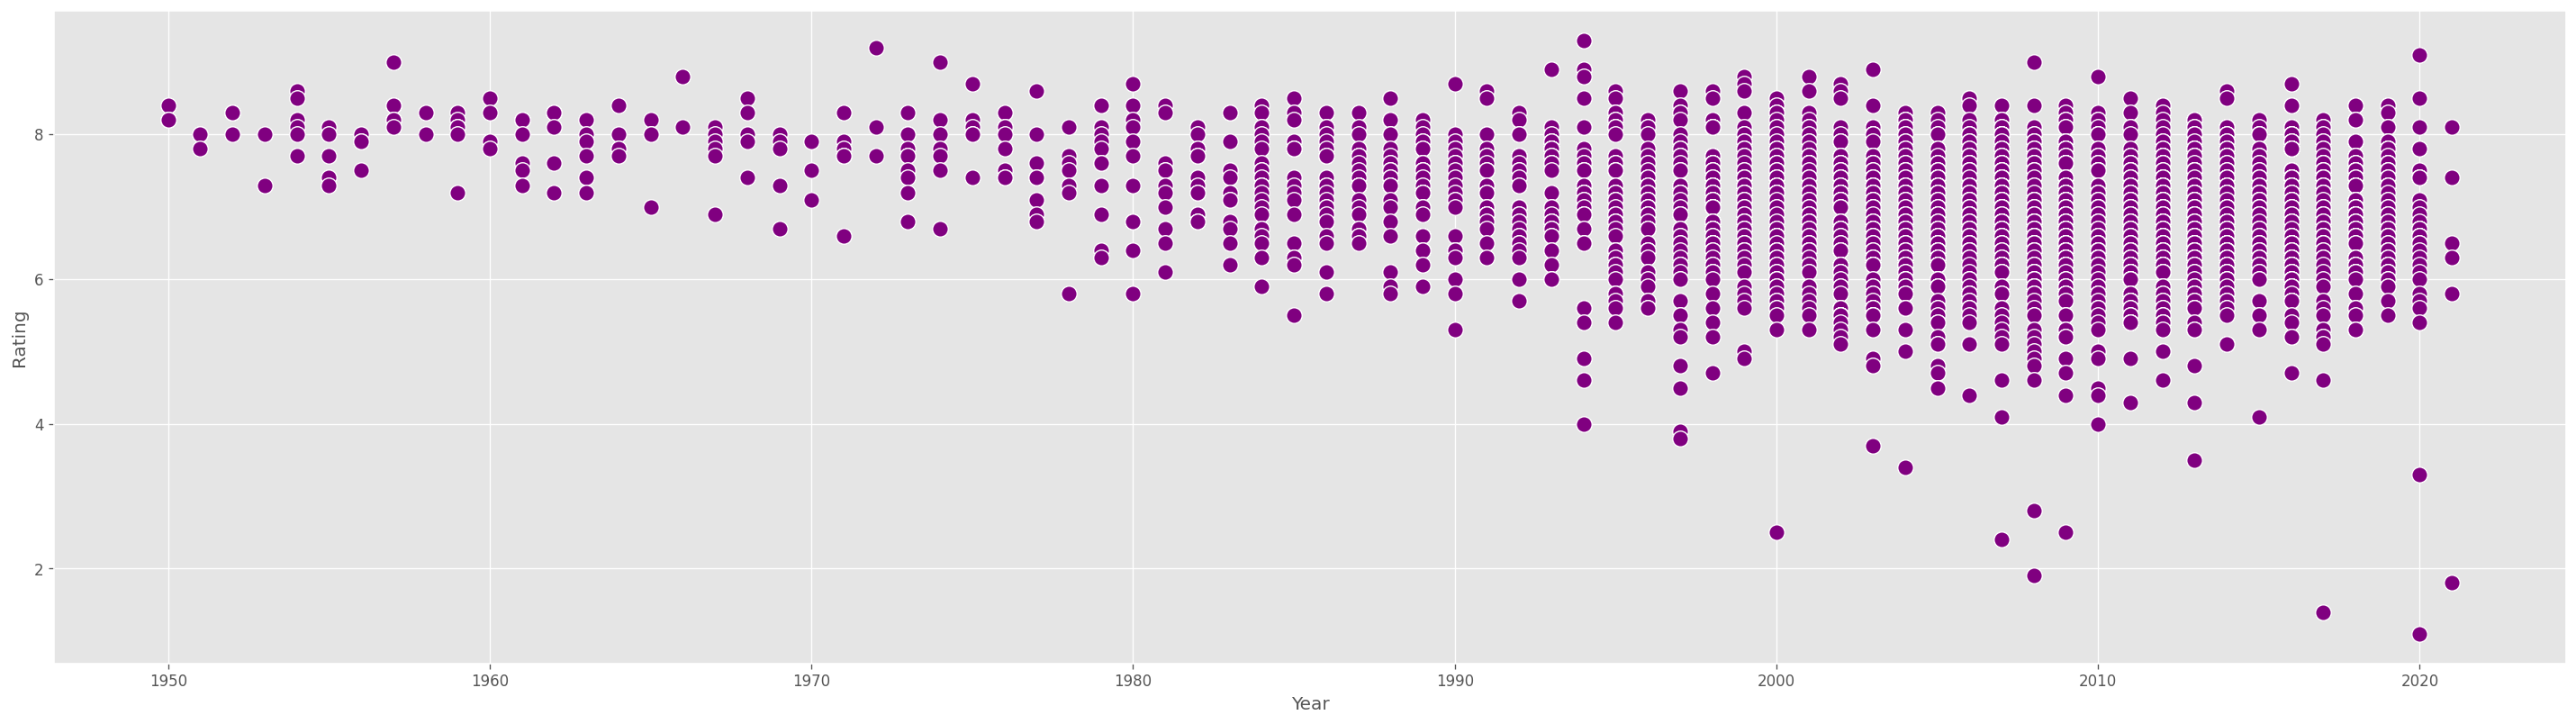

In [ ]:
fig, ax = plt.subplots(figsize=(30,8), dpi= 120)    

sns.scatterplot(x='Year', y='Rating', data=data, s=110, ax=ax, color='purple')
plt.savefig('scatterplot.png')

In [ ]:
# Draw Stripplot
fig, ax = plt.subplots(figsize=(40,22), dpi= 512)    
sns.stripplot(data.Year, data.Rating, jitter=0.4, size=12, ax=ax, linewidth=.4)

# Decorations
plt.title('Use jittered plots to avoid overlapping of points', fontsize=26)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


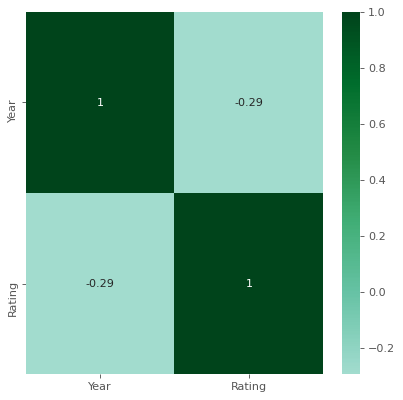

In [ ]:
plt.figure(figsize=(6,6), dpi= 80)

sns.heatmap(data.corr(method ='pearson'), xticklabels=data.corr().columns, yticklabels=data.corr().columns, cmap='BuGn', center=0, annot=True)

## **Data Processing**: Creating and Training the Model

#### Data processing is defined as a process of performing defined operations on data such as includes the conversion of raw data to machine-readable form to discover useful information for decision-making.

In [ ]:
# Reading ratings file
ratings = pd.read_csv('ratings.csv', sep=',', encoding='latin-1', usecols=['userId','movieId','rating','timestamp'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep=',', encoding='latin-1', usecols=['movieId','title','genres'])

In [ ]:
df_movies = movies 
df_ratings = ratings

In [ ]:
df_movies.head(5)

movieId  ...                                       genres
0        1  ...  Adventure|Animation|Children|Comedy|Fantasy
1        2  ...                   Adventure|Children|Fantasy
2        3  ...                               Comedy|Romance
3        4  ...                         Comedy|Drama|Romance
4        5  ...                                       Comedy

[5 rows x 3 columns]

<BarContainer object of 19 artists>

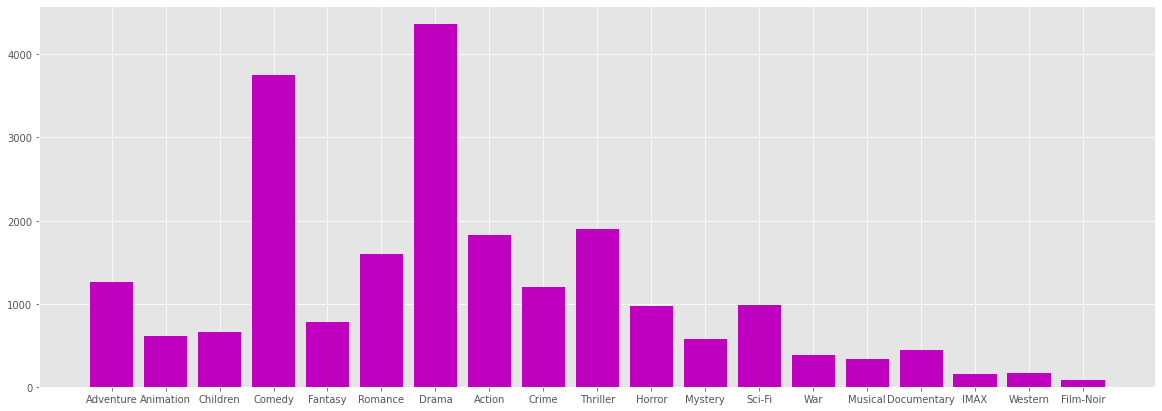

In [ ]:
plt.figure(figsize=(20,7))
generlist = df_movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='m')

In [ ]:
df_ratings.head(5)

userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931

In [ ]:
df_ratings.tail(5)

userId  movieId  rating   timestamp
100831     610   166534     4.0  1493848402
100832     610   168248     5.0  1493850091
100833     610   168250     5.0  1494273047
100834     610   168252     5.0  1493846352
100835     610   170875     3.0  1493846415

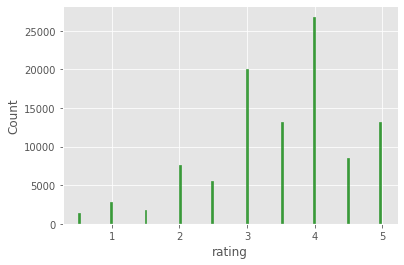

In [ ]:
sns.histplot(df_ratings["rating"], color = 'green');

In [ ]:
print("Shape of frames: \n"+ " Rating DataFrame"+ str(df_ratings.shape)+"\n Movies DataFrame"+ str(df_movies.shape))

Shape of frames: 
 Rating DataFrame(100836, 4)
 Movies DataFrame(9742, 3)


In [ ]:
merge_ratings_movies = pd.merge(df_movies, df_ratings, on='movieId', how='inner')
merge_ratings_movies.head(40)

movieId             title  ... rating   timestamp
0         1  Toy Story (1995)  ...    4.0   964982703
1         1  Toy Story (1995)  ...    4.0   847434962
2         1  Toy Story (1995)  ...    4.5  1106635946
3         1  Toy Story (1995)  ...    2.5  1510577970
4         1  Toy Story (1995)  ...    4.5  1305696483
5         1  Toy Story (1995)  ...    3.5  1455209816
6         1  Toy Story (1995)  ...    4.0   965705637
7         1  Toy Story (1995)  ...    3.5  1407618878
8         1  Toy Story (1995)  ...    3.0   962685262
9         1  Toy Story (1995)  ...    5.0   850466616
10        1  Toy Story (1995)  ...    3.0   856736119
11        1  Toy Story (1995)  ...    3.0   939647444
12        1  Toy Story (1995)  ...    5.0   832058959
13        1  Toy Story (1995)  ...    5.0   848993983
14        1  Toy Story (1995)  ...    3.0   869251860
15        1  Toy Story (1995)  ...    4.0   951170182
16        1  Toy Story (1995)  ...    5.0   834787906
17        1  Toy Story (1995)  ...    3.0  1514238116
18        1  Toy Story (1995)  ...    3.0   830247330
19        1  Toy Story (1995)  ...    5.0   965796031
20        1  Toy Story (1995)  ...    5.0  1443199669
21        1  Toy Story (1995)  ...    4.0  1161520134
22        1  Toy Story (1995)  ...    4.0  1104643957
23        1  Toy Story (1995)  ...    2.5  1158531426
24        1  Toy Story (1995)  ...    5.0   864737933
25        1  Toy Story (1995)  ...    4.5  1464196374
26        1  Toy Story (1995)  ...    0.5  1439165548
27        1  Toy Story (1995)  ...    4.0  1252575124
28        1  Toy Story (1995)  ...    2.5  1084467729
29        1  Toy Story (1995)  ...    4.0  1344082549
30        1  Toy Story (1995)  ...    3.0  1520408314
31        1  Toy Story (1995)  ...    3.0   856353996
32        1  Toy Story (1995)  ...    4.0  1112713037
33        1  Toy Story (1995)  ...    3.0   942767337
34        1  Toy Story (1995)  ...    5.0   964772990
35        1  Toy Story (1995)  ...    4.5  1532457849
36        1  Toy Story (1995)  ...    4.0  1431954238
37        1  Toy Story (1995)  ...    4.0   829322340
38        1  Toy Story (1995)  ...    3.0  1442535639
39        1  Toy Story (1995)  ...    3.5  1435942468

[40 rows x 6 columns]

In [ ]:
merge_ratings_movies = merge_ratings_movies.drop('timestamp', axis=1)
merge_ratings_movies.shape

(100836, 5)

In [ ]:
ratings_grouped_by_users = merge_ratings_movies.groupby('userId').agg([np.size, np.mean])
ratings_grouped_by_users.head(10) 

movieId               rating           timestamp              
          size          mean   size      mean      size          mean
userId                                                               
1          232   1854.603448  232.0  4.366379       232  9.649856e+08
2           29  70350.275862   29.0  3.948276        29  1.445715e+09
3           39   7058.384615   39.0  2.435897        39  1.306464e+09
4          216   1982.129630  216.0  3.555556       216  9.658643e+08
5           44    343.840909   44.0  3.636364        44  8.474351e+08
6          314    389.041401  314.0  3.493631       314  8.455546e+08
7          152  10908.256579  152.0  3.230263       152  1.115625e+09
8           47    297.978723   47.0  3.574468        47  8.394636e+08
9           46   3707.043478   46.0  3.260870        46  1.044657e+09
10         140  51465.307143  140.0  3.278571       140  1.455351e+09

In [ ]:
ratings_grouped_by_users = ratings_grouped_by_users.drop('movieId', axis = 1)

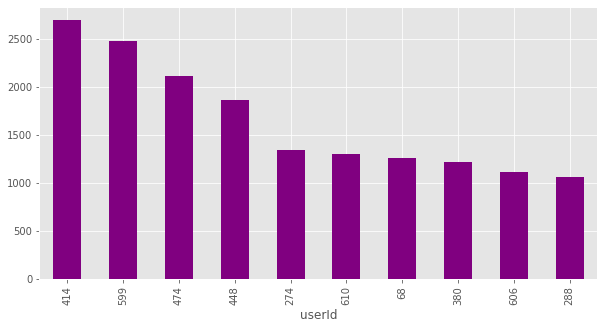

In [ ]:
ratings_grouped_by_users['rating']['size'].sort_values(ascending=False).head(10).plot(kind='bar', color='purple', figsize = (10,5))

In [ ]:
ratings_grouped_by_movies = merge_ratings_movies.groupby('movieId').agg([np.mean], np.size)
ratings_grouped_by_movies.shape

(9724, 2)

In [ ]:
ratings_grouped_by_movies.head(10)

rating
             mean
movieId          
1        3.920930
2        3.431818
3        3.259615
4        2.357143
5        3.071429
6        3.946078
7        3.185185
8        2.875000
9        3.125000
10       3.496212

In [ ]:
ratings_grouped_by_movies = ratings_grouped_by_movies.drop('userId', axis=1)

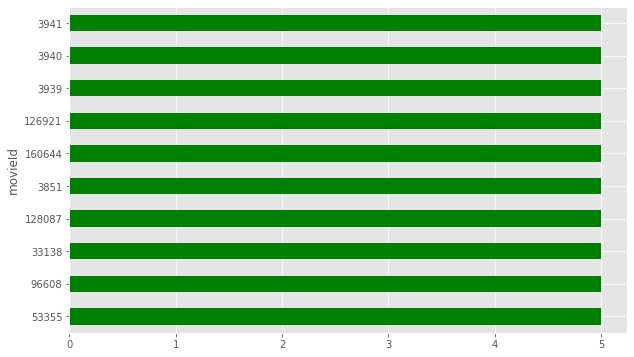

In [ ]:
ratings_grouped_by_movies['rating']['mean'].sort_values(ascending=False).head(10).plot(kind='barh', color= 'green', figsize=(10,6));

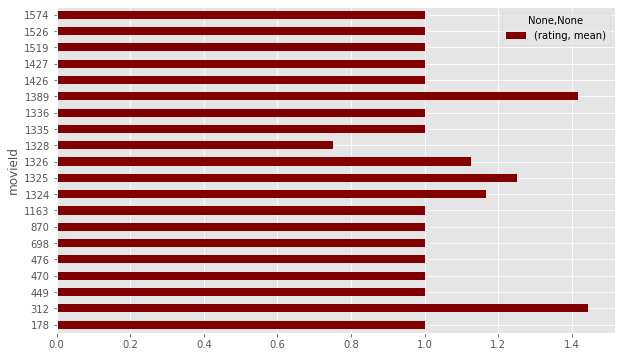

In [ ]:
low_rated_movies_filter = ratings_grouped_by_movies['rating']['mean']< 1.5
low_rated_movies = ratings_grouped_by_movies[low_rated_movies_filter]
low_rated_movies.head(20).plot(kind='barh', color='maroon', figsize=(10,6));

In [ ]:
low_rated_movies.head(20)

rating
             mean
movieId          
178      1.000000
312      1.444444
449      1.000000
470      1.000000
476      1.000000
698      1.000000
870      1.000000
1163     1.000000
1324     1.166667
1325     1.250000
1326     1.125000
1328     0.750000
1335     1.000000
1336     1.000000
1389     1.416667
1426     1.000000
1427     1.000000
1519     1.000000
1526     1.000000
1574     1.000000

## **Data Processing:** Building the Recommender Model and training it.

Content-based Filtering is a Machine Learning technique that uses similarities in features to make decisions. This technique is often used in recommender systems, which are algorithms designed to advertise or recommend things to users based on knowledge accumulated about the user.

The concepts of Term Frequency (TF) and Inverse Document Frequency (IDF) are used in information retrieval systems and also content based filtering mechanisms (such as a content based recommender). 

> ![Image](https://miro.medium.com/max/538/1*dug-uXDMOD6H5JMnYNpgfQ.png) 



**Cosine similarity** is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Given two vectors of attributes, A and B, the cosine similarity, cos(θ), is represented using a dot product and magnitude as:

>![COSINE](https://neo4j.com/docs/graph-algorithms/current/images/cosine-similarity.png)








In [ ]:
# Define a TF-IDF Vectorizer Object.
tfidf_movies_genres = TfidfVectorizer(token_pattern = '[a-zA-Z0-9\-]+')

#Replace NaN with an empty string
df_movies['genres'] = df_movies['genres'].replace(to_replace="(no genres listed)", value="")

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_movies_genres_matrix = tfidf_movies_genres.fit_transform(df_movies['genres'])
# print(tfidf_movies_genres.get_feature_names())

# Compute the cosine similarity matrix
cosine_sim_movies = linear_kernel(tfidf_movies_genres_matrix, tfidf_movies_genres_matrix) 

In [ ]:
def get_recommendations_based_on_genres(movie_title, cosine_sim_movies=cosine_sim_movies):
  
    # Get the index of the movie that matches the title
    idx_movie = df_movies.loc[df_movies['title'].isin([movie_title])]
    idx_movie = idx_movie.index
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores_movies = list(enumerate(cosine_sim_movies[idx_movie][0]))
    
    # Sort the movies based on the similarity scores
    sim_scores_movies = sorted(sim_scores_movies, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores_movies = sim_scores_movies[1:9]
    
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores_movies]
    
    # Return the top 2 most similar movies
    return df_movies['title'].iloc[movie_indices]

In [ ]:
get_recommendations_based_on_genres("White House Down (2013)")

8346                  Jack Ryan: Shadow Recruit (2014)
8149         Grandmaster, The (Yi dai zong shi) (2013)
7769                         Bourne Legacy, The (2012)
7599    Fast Five (Fast and the Furious 5, The) (2011)
8233                             Man of Tai Chi (2013)
6207                                   Poseidon (2006)
7774       Mission: Impossible - Ghost Protocol (2011)
7955                                    Skyfall (2012)
Name: title, dtype: object

In [ ]:
def get_recommendation_content_model(userId):
    
    recommended_movie_list = []
    movie_list = []
    #obtain all the ratings awarded by the user over time
    df_rating_filtered = df_ratings[df_ratings["userId"]== userId]

    #obtain all the movie names and movieid of the rated movies
    for key, row in df_rating_filtered.iterrows():
        movie_list.append((df_movies["title"][row["movieId"]==df_movies["movieId"]]).values)

    #fed each movie name to the get_recommendations_based_on_genres and receive 10 more such suggestions
    for index, movie in enumerate(movie_list):
        for key, movie_recommended in get_recommendations_based_on_genres(movie[0]).iteritems():
            recommended_movie_list.append(movie_recommended)

    # removing already watched movie from recommended list    
    for movie_title in recommended_movie_list:
        if movie_title in movie_list:
            recommended_movie_list.remove(movie_title)
    
    return set(recommended_movie_list)

get_recommendation_content_model(78)

{'48 Hrs. (1982)',
 '52 Pick-Up (1986)',
 'Abyss, The (1989)',
 'Ace Ventura: When Nature Calls (1995)',
 'Adventures of Buckaroo Banzai Across the 8th Dimension, The (1984)',
 'Adventures of Rocky and Bullwinkle, The (2000)',
 'Albino Alligator (1996)',
 'Alice in Wonderland (2010)',
 'Alien: Resurrection (1997)',
 'Allan Quatermain and the Lost City of Gold (1987)',
 'Alligator (1980)',
 'And Starring Pancho Villa as Himself (2003)',
 'Another 48 Hrs. (1990)',
 'Antz (1998)',
 'Armour of God (Long xiong hu di) (1987)',
 'Armour of God II: Operation Condor (Operation Condor) (Fei ying gai wak) (1991)',
 'Arrival, The (1996)',
 'Assassins (1995)',
 "Astronaut's Wife, The (1999)",
 'Attack the Block (2011)',
 'Austin Powers: The Spy Who Shagged Me (1999)',
 'Avatar (2009)',
 'Avengers, The (1998)',
 'Avengers, The (2012)',
 'Babysitter, The (1995)',
 'Back to the Future (1985)',
 'Back to the Future Part II (1989)',
 'Bad Boys (1995)',
 'Balance (1989)',
 'Band Wagon, The (1953)',
 'Ban